# Reproduce our results

## Setup (Same as "Setup" in README) (Please run only the first once)

We recommend preparing a new virtual environment (python>=3.6) before executing these commands.
Install necessary packages:
> $ cd configs

> $ pip install pip-tools

> $ pip-compile requirements.in

> $ pip-sync

Install PyTorch using the command in 
https://pytorch.org/

e.g.,
>$ pip install torch torchvision torchaudio

## Download the data for analysis

Please download `unlabeled_attn.pkl` from https://drive.google.com/open?id=1DEIBQIl0Q0az5ZuLoy4_lYabIfLSKBg- 

This data is published by [Clark et al., 2019](https://aclanthology.org/W19-4828/). Github: https://github.com/clarkkev/attention-analysis

# Preprocess the data

In [1]:
!python ./src/data_extract.py
!python ./src/data_extract_roberta.py

100%|███████████████████████████████████████| 992/992 [00:00<00:00, 4609.93it/s]


# Visualization of the token-by-token interaction (Figure 1)

Attn-W:


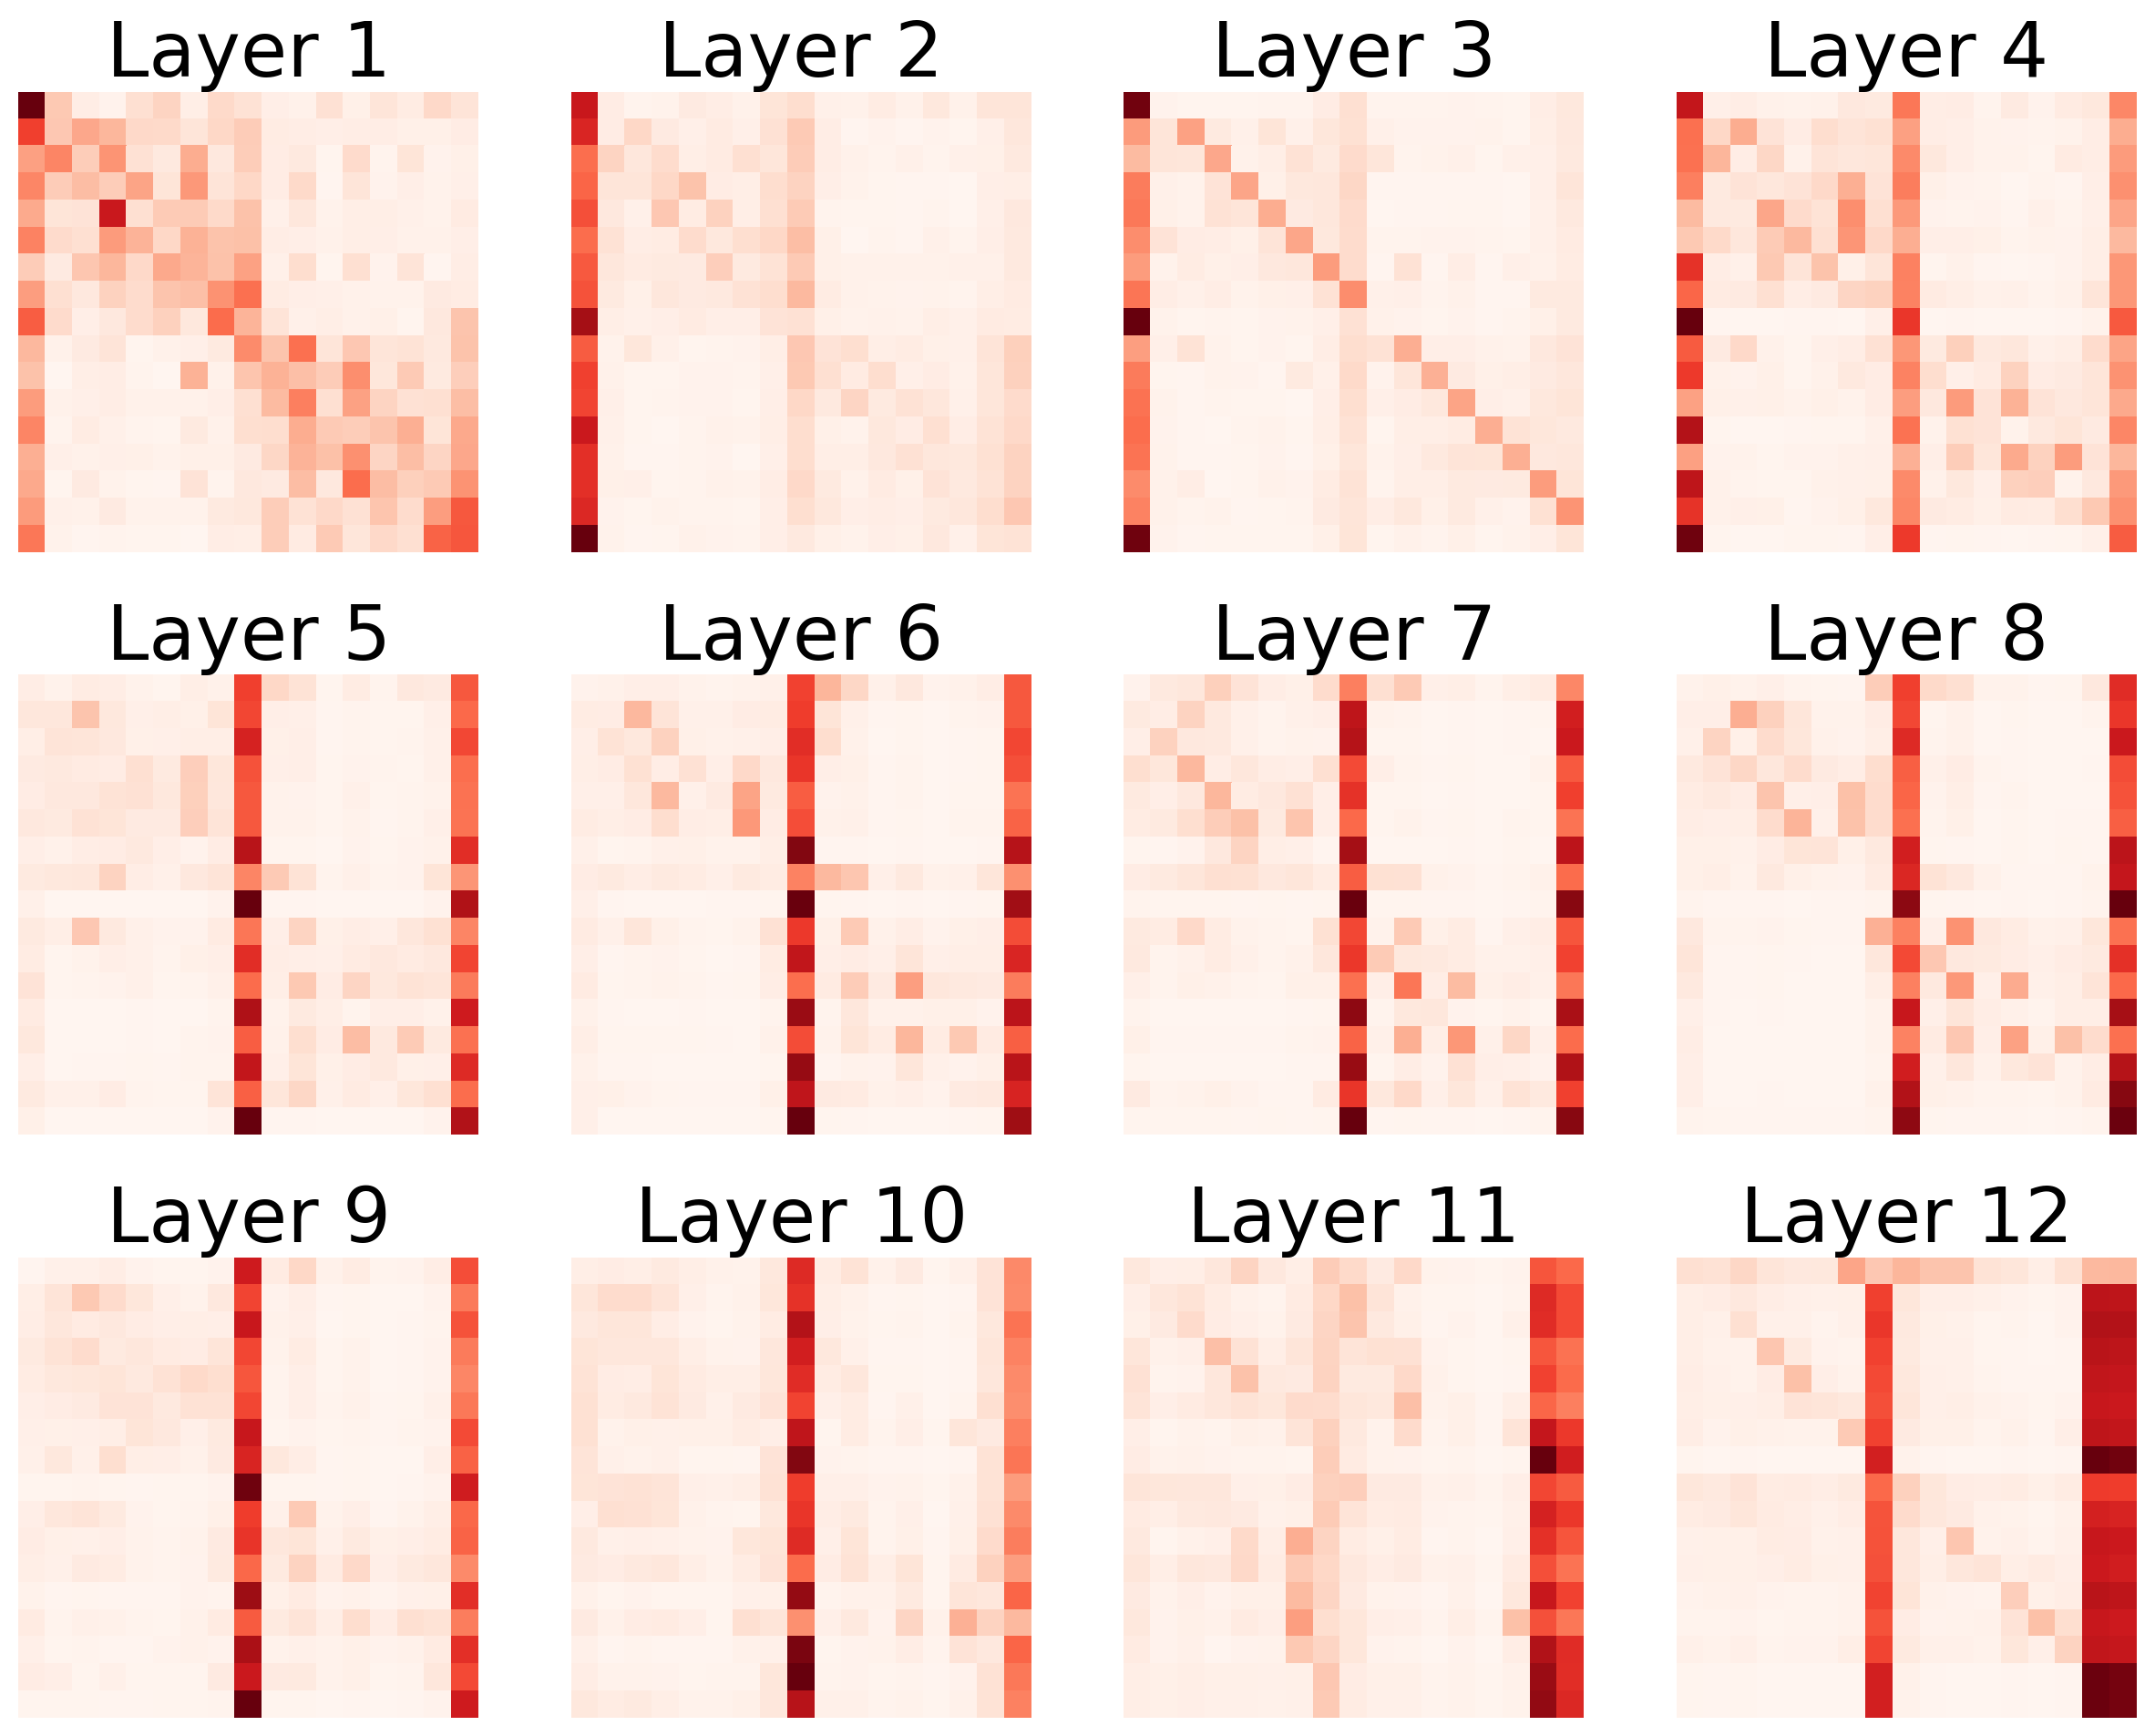

AttnRes-W:


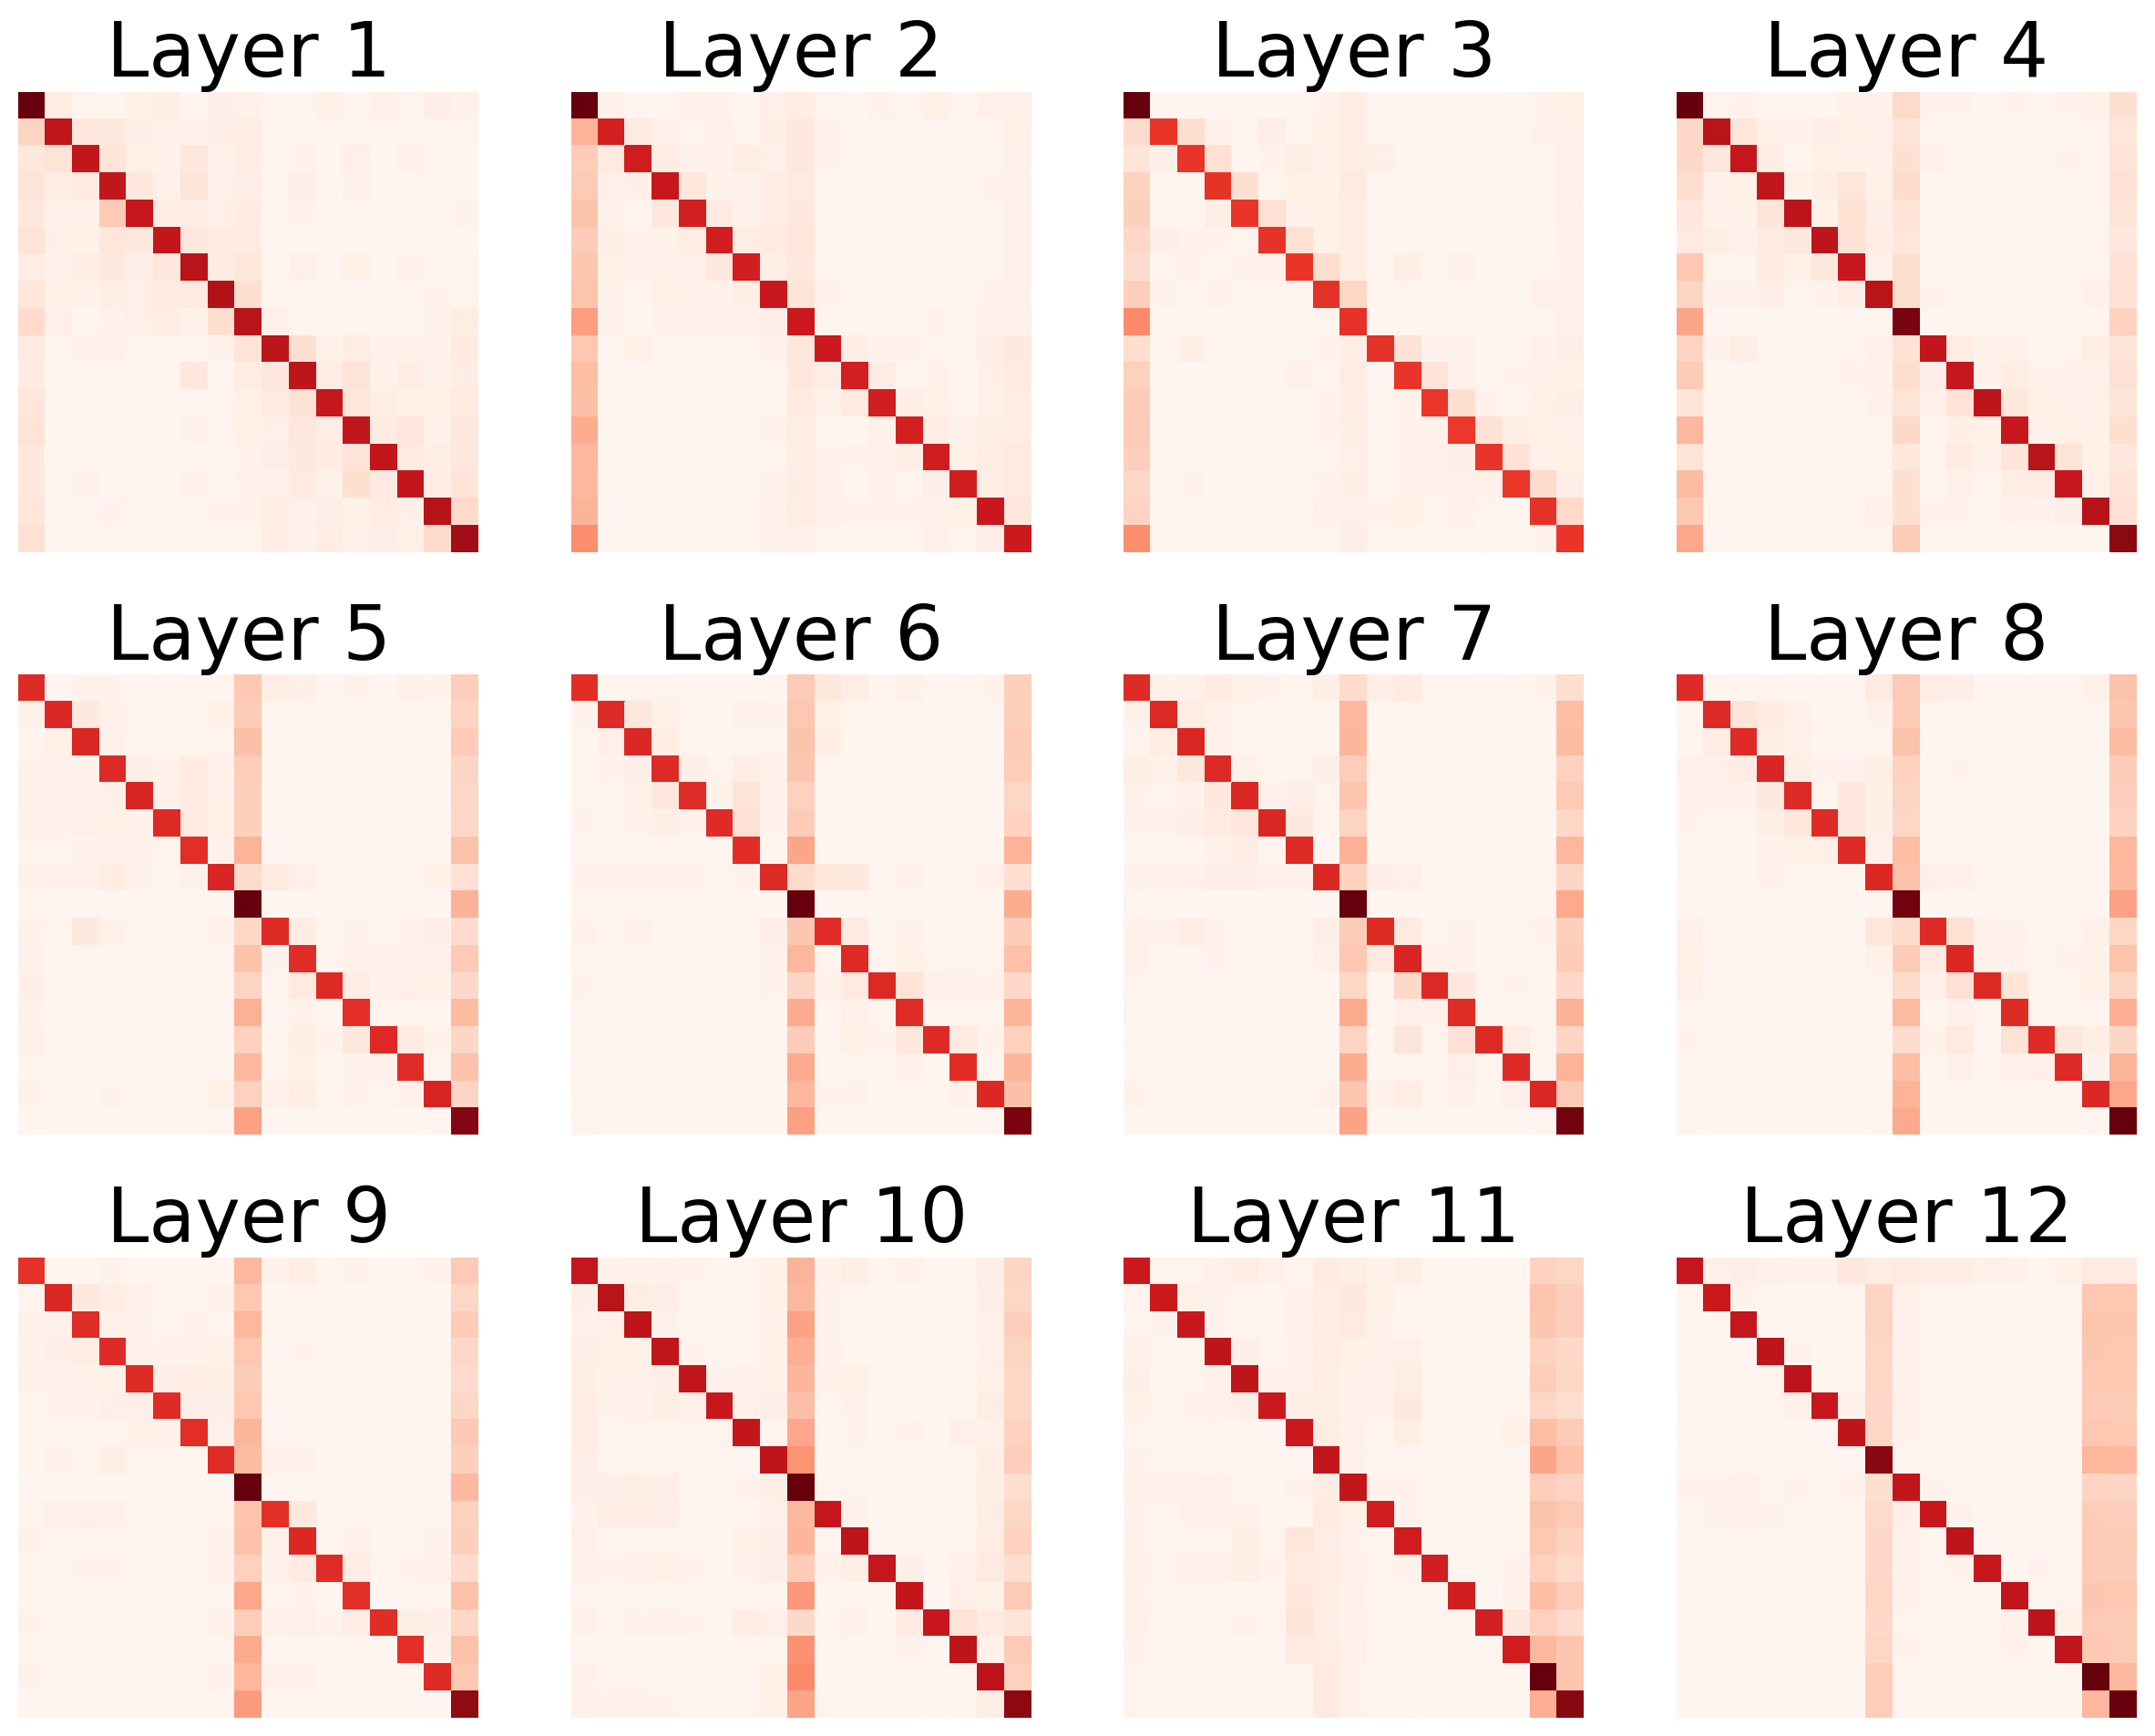

Attn-N:


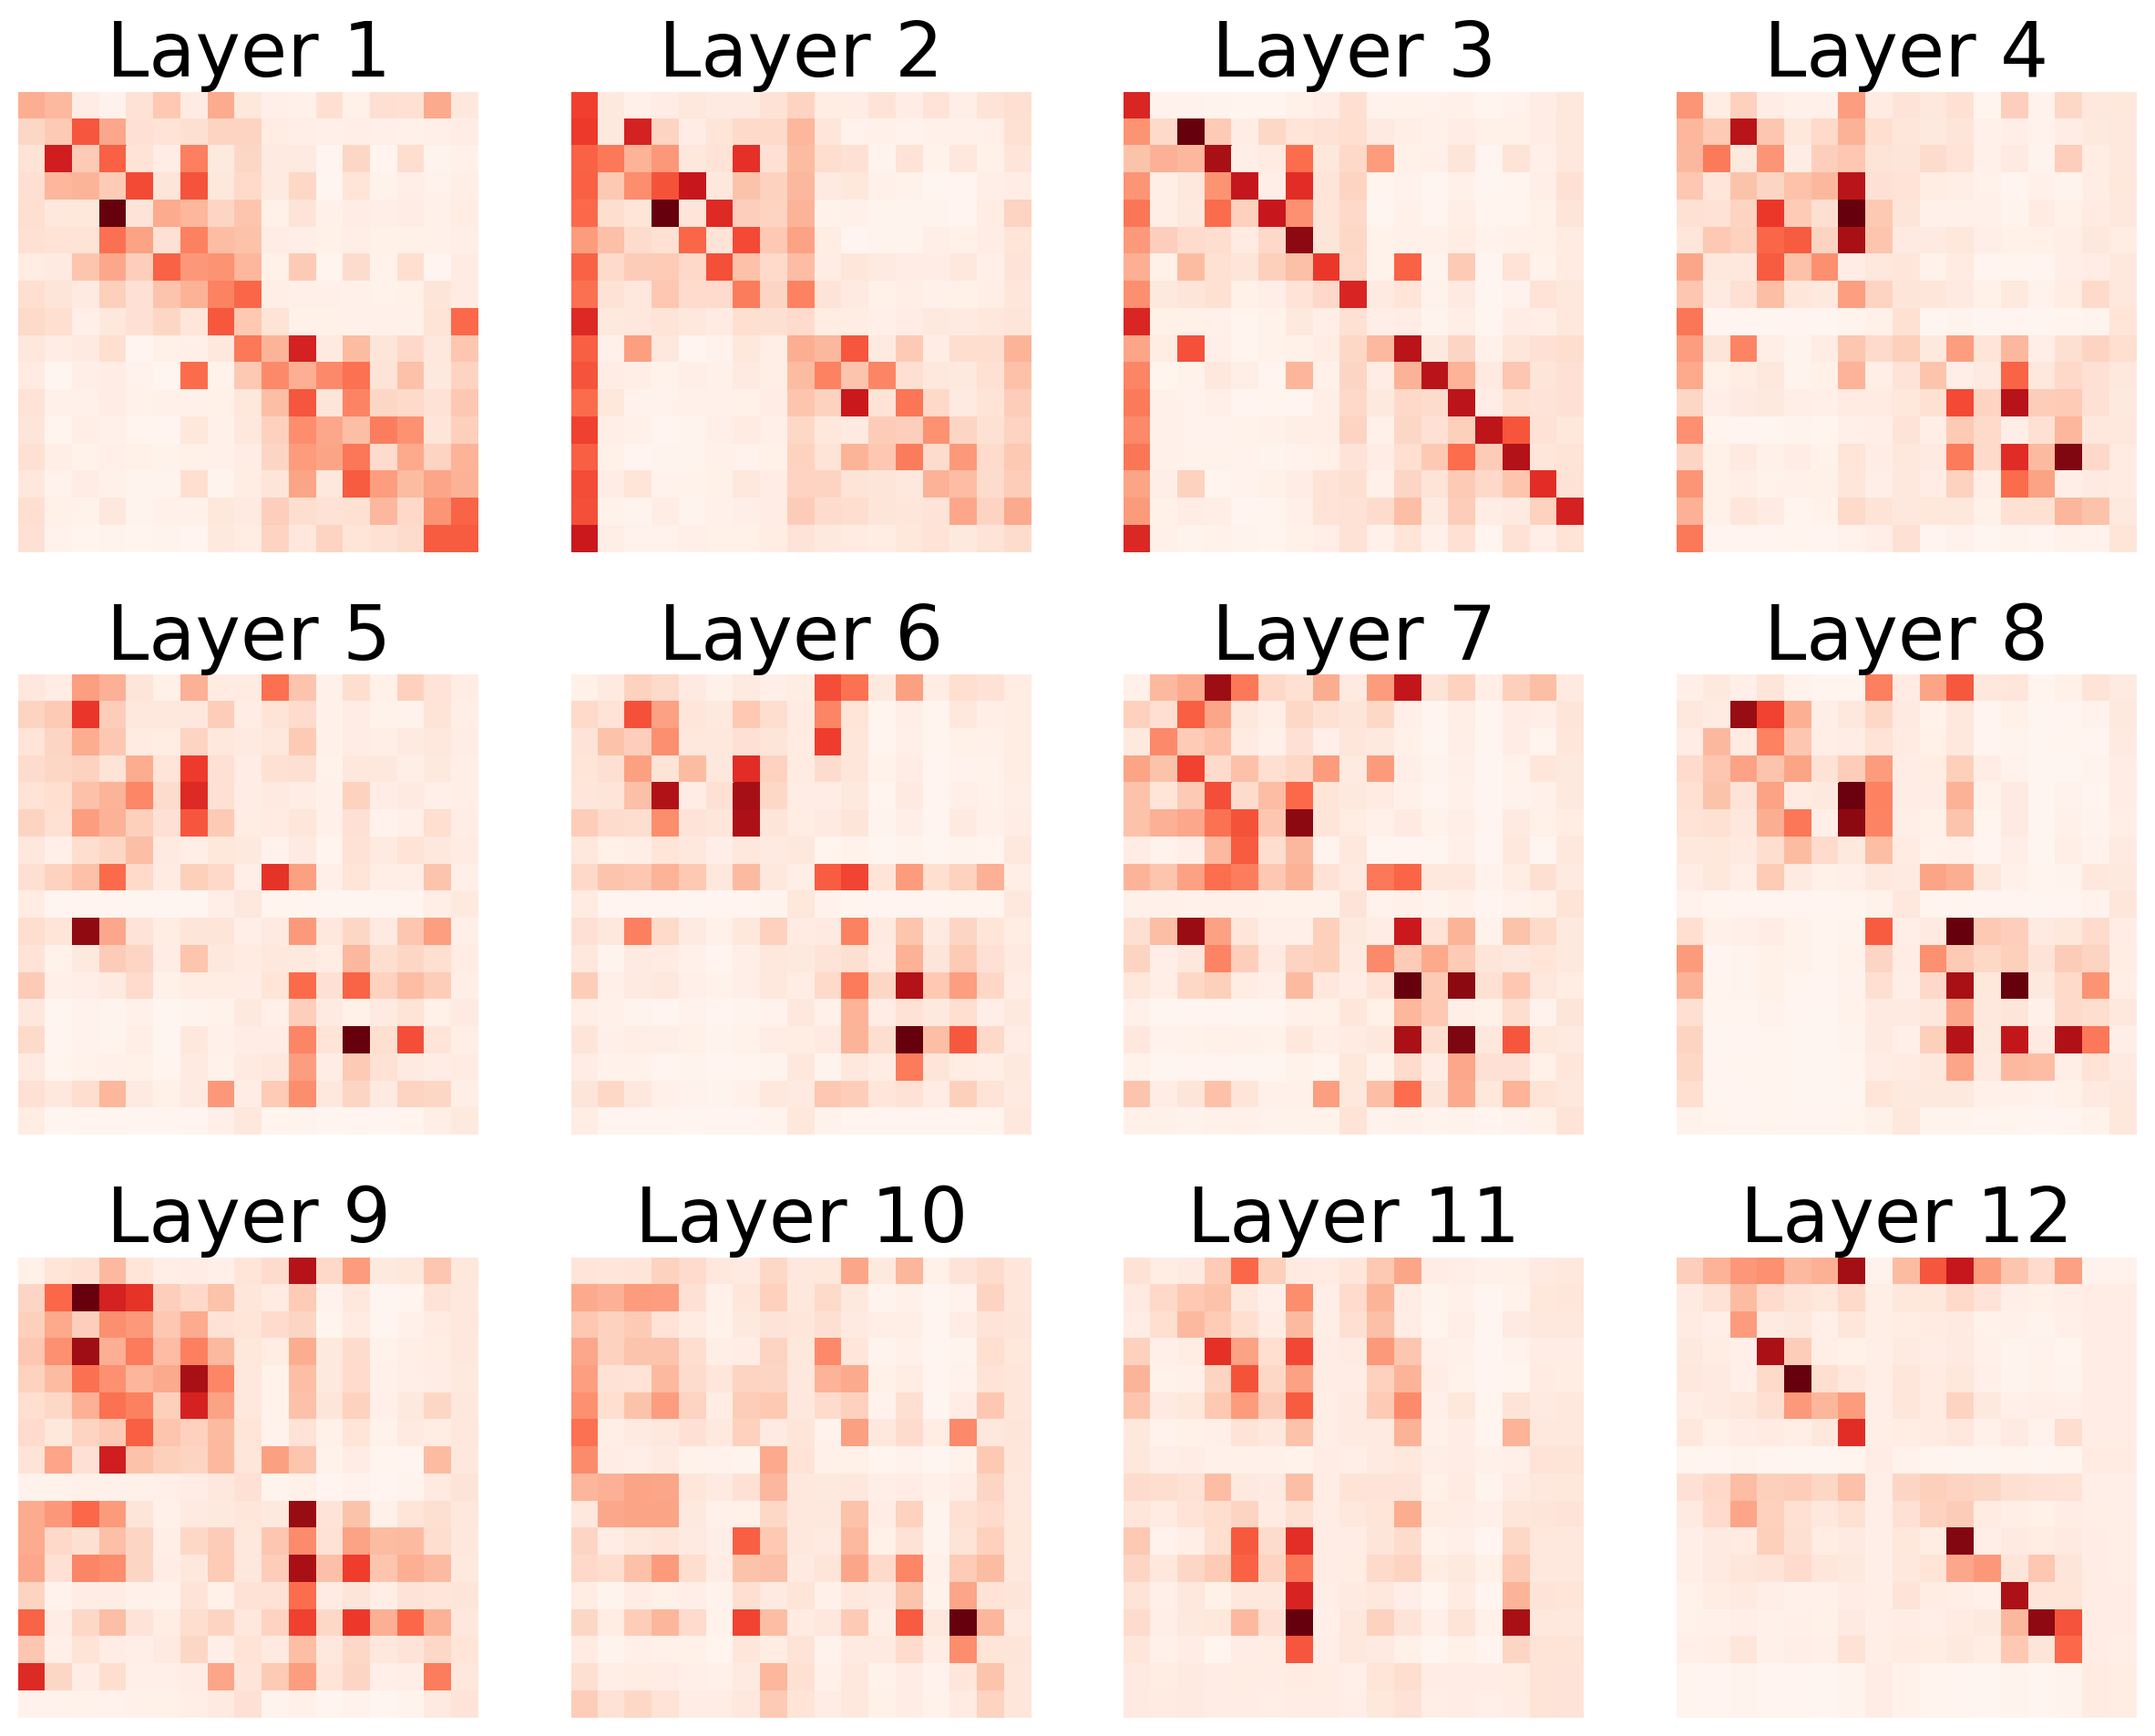

AttnResLn-N (Proposed):


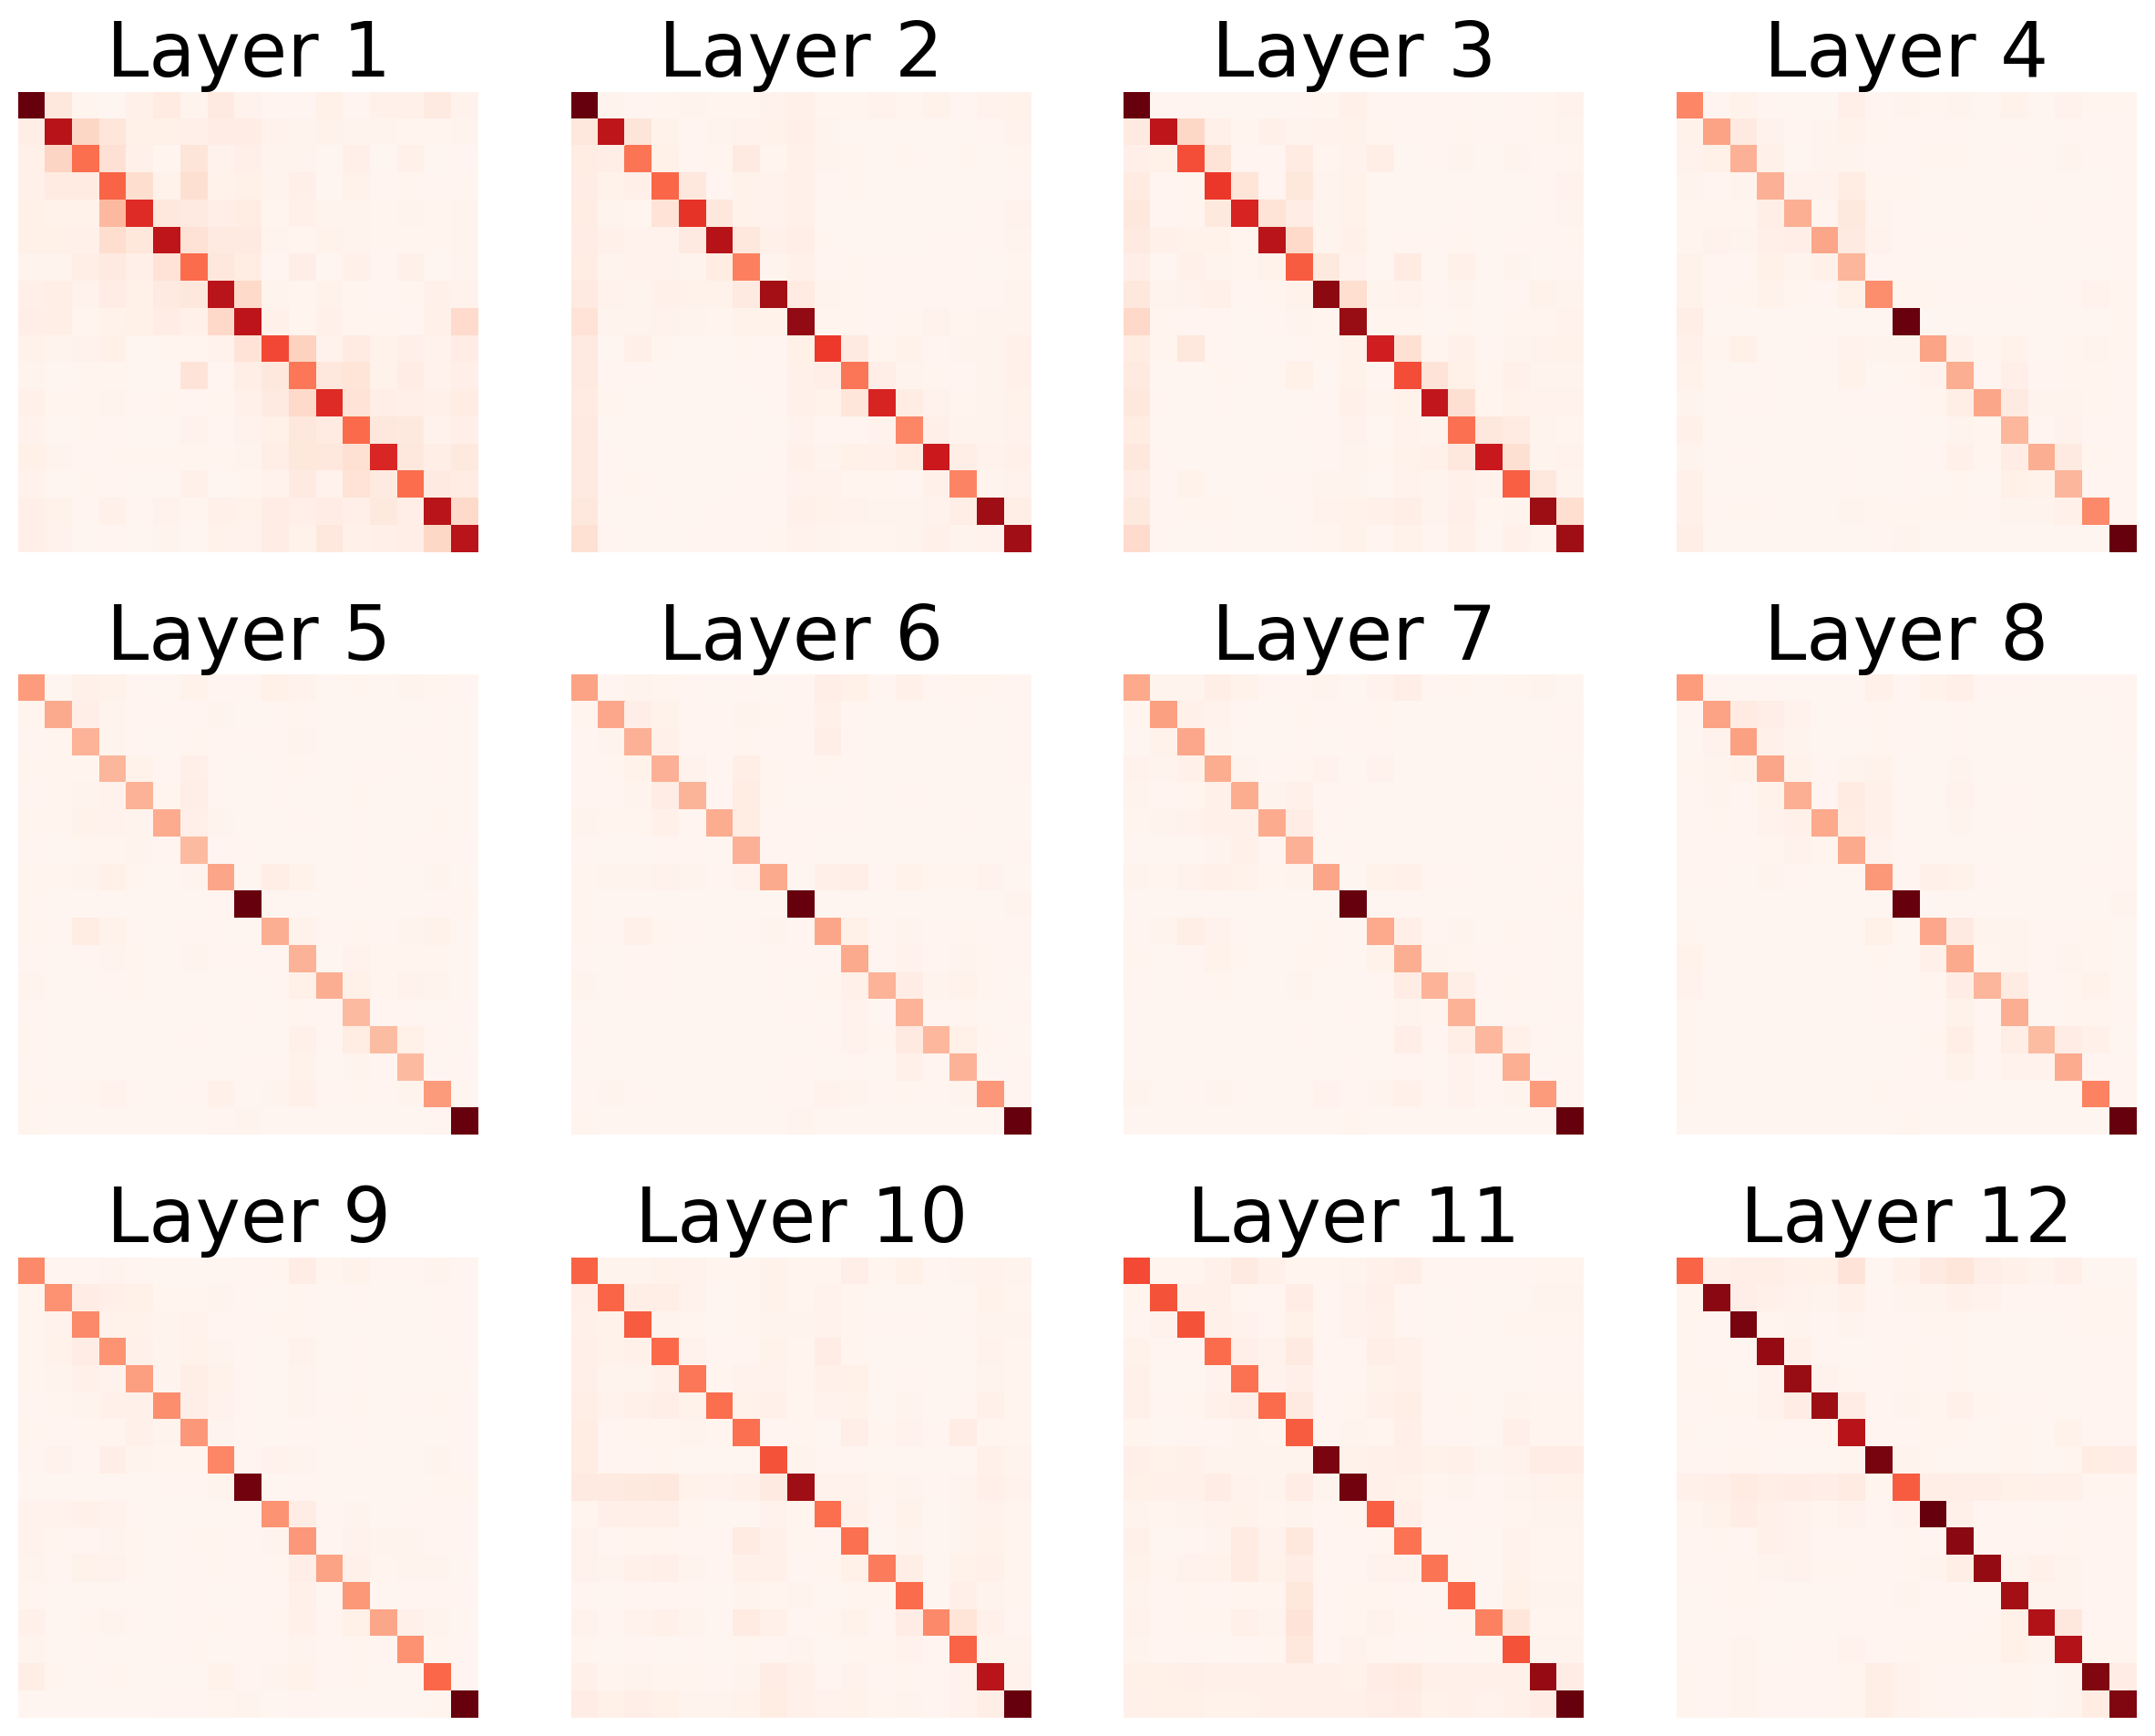

In [1]:
from src.bert_visualize import MixingViz


MV = MixingViz()

sent1 = "The man went to the store."
sent2 = "He bought a gallon of milk."
MV.visualize(sent1, sent2, axes=False, size=30)

# Statistics of the mixing ratio (Table 1)

### BERT-base

In [38]:
!CUDA_VISIBLE_DEVICES=0 python ./src/mixing_ratio_stats_bert.py

The current process just got forked. Disabling parallelism to avoid deadlocks...
To disable this warning, please explicitly set TOKENIZERS_PARALLELISM=(true | false)
100%|█████████████████████████████████████████| 992/992 [01:20<00:00, 12.27it/s]


In [39]:
import torch


def calculate_stats(mixing_ratio_lis):
    count, total, maximum, minimum = 0, 0, 0, 100

    for lis in mixing_ratio_lis:
        for ratio in lis:
            ratio *= 100
            count += 1
            total += ratio
            maximum = max(maximum, ratio)
            minimum = min(minimum, ratio)
    return total/count, maximum, minimum

size = "base"

print("Method\t\tMean\tMax\tMin")
print("-"*50)

attn_w_ratio_lis = torch.load(f"./work/bert_{size}/Attn_w_mixing_ratio")
mean, maximum, minimum = calculate_stats(attn_w_ratio_lis)
print(f"Attn-W\t\t{mean:.2f}\t{maximum:.2f}\t{minimum:.2f}")

attn_n_ratio_lis = torch.load(f"./work/bert_{size}/Attn_n_mixing_ratio")
mean, maximum, minimum = calculate_stats(attn_n_ratio_lis)
print(f"Attn-N\t\t{mean:.2f}\t{maximum:.2f}\t{minimum:.2f}")

attnres_w_ratio_lis = torch.load(f"./work/bert_{size}/AttnRes_w_mixing_ratio")
mean, maximum, minimum = calculate_stats(attnres_w_ratio_lis)
print(f"AttnRes-W\t{mean:.2f}\t{maximum:.2f}\t{minimum:.2f}")

attnres_n_ratio_lis = torch.load(f"./work/bert_{size}/AttnRes_n_mixing_ratio")
mean, maximum, minimum = calculate_stats(attnres_n_ratio_lis)
print(f"AttnRes-N\t{mean:.2f}\t{maximum:.1f}\t{minimum:.2f}")

attnresln_n_ratio_lis = torch.load(f"./work/bert_{size}/AttnResLn_n_mixing_ratio")
mean, maximum, minimum = calculate_stats(attnresln_n_ratio_lis)
print(f"AttnResLn-N\t{mean:.2f}\t{maximum:.2f}\t{minimum:.2f}")

Method		Mean	Max	Min
--------------------------------------------------
Attn-W		96.41	99.99	45.04
Attn-N		85.28	99.96	4.89
AttnRes-W	48.21	49.99	22.52
AttnRes-N	22.25	65.7	2.04
AttnResLn-N	18.75	61.25	1.27


### RoBERTa-base

In [40]:
!CUDA_VISIBLE_DEVICES=0 python ./src/mixing_ratio_stats_roberta.py

The current process just got forked. Disabling parallelism to avoid deadlocks...
To disable this warning, please explicitly set TOKENIZERS_PARALLELISM=(true | false)
100%|█████████████████████████████████████████| 992/992 [02:12<00:00,  7.51it/s]


In [41]:
import torch


def calculate_stats(mixing_ratio_lis):
    count, total, maximum, minimum = 0, 0, 0, 100

    for lis in mixing_ratio_lis:
        for ratio in lis:
            ratio *= 100
            count += 1
            total += ratio
            maximum = max(maximum, ratio)
            minimum = min(minimum, ratio)
    return total/count, maximum, minimum

size = "base"

print("Method\t\tMean\tMax\tMin")
print("-"*50)

attn_w_ratio_lis = torch.load(f"./work/roberta_{size}/Attn_w_mixing_ratio")
mean, maximum, minimum = calculate_stats(attn_w_ratio_lis)
print(f"Attn-W\t\t{mean:.2f}\t{maximum:.2f}\t{minimum:.2f}")

attn_n_ratio_lis = torch.load(f"./work/roberta_{size}/Attn_n_mixing_ratio")
mean, maximum, minimum = calculate_stats(attn_n_ratio_lis)
print(f"Attn-N\t\t{mean:.2f}\t{maximum:.2f}\t{minimum:.2f}")

attnres_w_ratio_lis = torch.load(f"./work/roberta_{size}/AttnRes_w_mixing_ratio")
mean, maximum, minimum = calculate_stats(attnres_w_ratio_lis)
print(f"AttnRes-W\t{mean:.2f}\t{maximum:.2f}\t{minimum:.2f}")

attnres_n_ratio_lis = torch.load(f"./work/roberta_{size}/AttnRes_n_mixing_ratio")
mean, maximum, minimum = calculate_stats(attnres_n_ratio_lis)
print(f"AttnRes-N\t{mean:.2f}\t{maximum:.1f}\t{minimum:.2f}")

attnresln_n_ratio_lis = torch.load(f"./work/roberta_{size}/AttnResLn_n_mixing_ratio")
mean, maximum, minimum = calculate_stats(attnresln_n_ratio_lis)
print(f"AttnResLn-N\t{mean:.2f}\t{maximum:.2f}\t{minimum:.2f}")

Method		Mean	Max	Min
--------------------------------------------------
Attn-W		95.81	100.00	3.82
Attn-N		84.42	99.93	13.84
AttnRes-W	47.91	50.00	1.91
AttnRes-N	19.55	69.9	1.82
AttnResLn-N	16.24	73.39	1.48


# Approximate expansion rate of ATTN's transformation $f$ (Section 4.4)

In [10]:
from src.expansion_rate_attn_f import expansion_rate

for model_name in ["bert-base-uncased", "bert-large-uncased", "prajjwal1/bert-mini", "prajjwal1/bert-tiny"]:
    print("-"*5, model_name, "-"*5)
    expansion_rate(model_name)

----- bert-base-uncased -----
Layer		 Mean
------------------------------
Layer 1 :	0.901
Layer 2 :	0.740
Layer 3 :	0.632
Layer 4 :	0.679
Layer 5 :	0.911
Layer 6 :	0.989
Layer 7 :	0.919
Layer 8 :	0.905
Layer 9 :	0.948
Layer 10 :	0.913
Layer 11 :	0.932
Layer 12 :	1.051
Mean :		0.877
------------------------------
----- bert-large-uncased -----
Layer		 Mean
------------------------------
Layer 1 :	0.970
Layer 2 :	0.702
Layer 3 :	0.612
Layer 4 :	0.625
Layer 5 :	0.631
Layer 6 :	0.708
Layer 7 :	0.729
Layer 8 :	0.761
Layer 9 :	0.680
Layer 10 :	0.633
Layer 11 :	0.673
Layer 12 :	0.821
Layer 13 :	0.886
Layer 14 :	0.916
Layer 15 :	0.855
Layer 16 :	0.855
Layer 17 :	0.865
Layer 18 :	0.755
Layer 19 :	0.800
Layer 20 :	0.872
Layer 21 :	1.008
Layer 22 :	0.851
Layer 23 :	0.868
Layer 24 :	1.081
Mean :		0.798
------------------------------
----- prajjwal1/bert-mini -----


Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertModel: ['bert.embeddings.position_ids']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Layer		 Mean
------------------------------
Layer 1 :	0.782
Layer 2 :	0.652
Layer 3 :	1.033
Layer 4 :	2.484
Mean :		1.238
------------------------------
----- prajjwal1/bert-tiny -----


Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertModel: ['bert.embeddings.position_ids']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Layer		 Mean
------------------------------
Layer 1 :	1.626
Layer 2 :	2.090
Mean :		1.858
------------------------------


# Visualization of mixig ratios for each token type at each layer of BERT-base (Figure3)

In [2]:
!CUDA_VISIBLE_DEVICES=0 python ./src/detailed_visualization_bert.py

100%|█████████████████████████████████████████| 992/992 [02:09<00:00,  7.65it/s]


In [4]:
import torch
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

size = "base"
layer_num = 12
sns.set(font_scale=2)

### Attn-W:

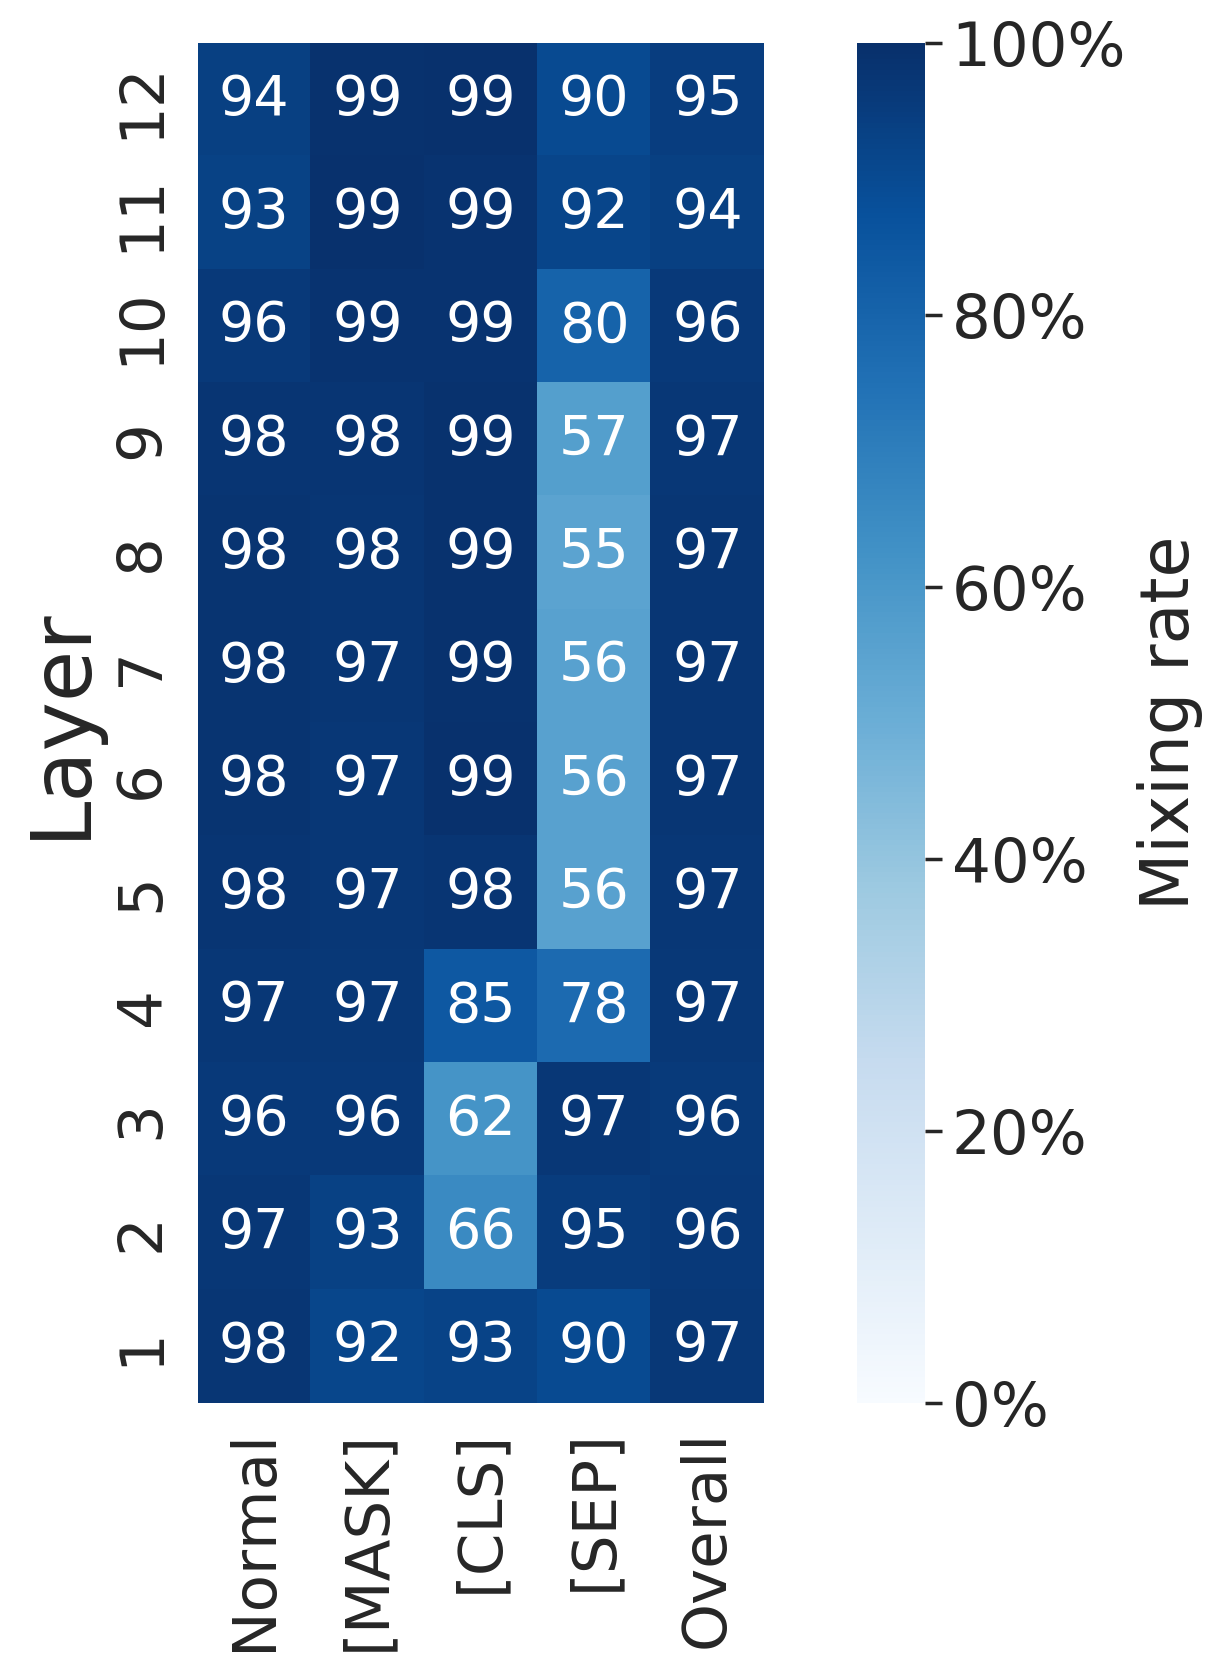

In [5]:
all_avg_lis = torch.load(f"./work/bert_{size}/avg/Attn_w_all")
cls_avg_lis = torch.load(f"./work/bert_{size}/avg/Attn_w_cls")
sep_avg_lis = torch.load(f"./work/bert_{size}/avg/Attn_w_sep")
mask_avg_lis = torch.load(f"./work/bert_{size}/avg/Attn_w_mask")
other_avg_lis = torch.load(f"./work/bert_{size}/avg/Attn_w_other")

plt.figure(figsize=(12,10), dpi=200)
lis = np.array([other_avg_lis[::-1], mask_avg_lis[::-1], cls_avg_lis[::-1], sep_avg_lis[::-1], all_avg_lis[::-1], ]).T * 100
df = pd.DataFrame(lis, columns=["Normal", "[MASK]", "[CLS]", "[SEP]", "Overall"], index=range(1,layer_num+1)[::-1])
ax = sns.heatmap(df,vmin=0,vmax=100,annot=True,cmap="Blues",square=True, fmt='.0f', annot_kws={"size": 20}, cbar_kws={'label': 'Mixing rate'})
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 20, 40, 60, 80, 100])
cbar.set_ticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.ylabel("Layer", fontsize=30)
plt.subplots_adjust(bottom=0.2)
plt.savefig(f"./results/bert_{size}_Attn_w_mixing_ratio.png")
plt.show()

### Attn-N:

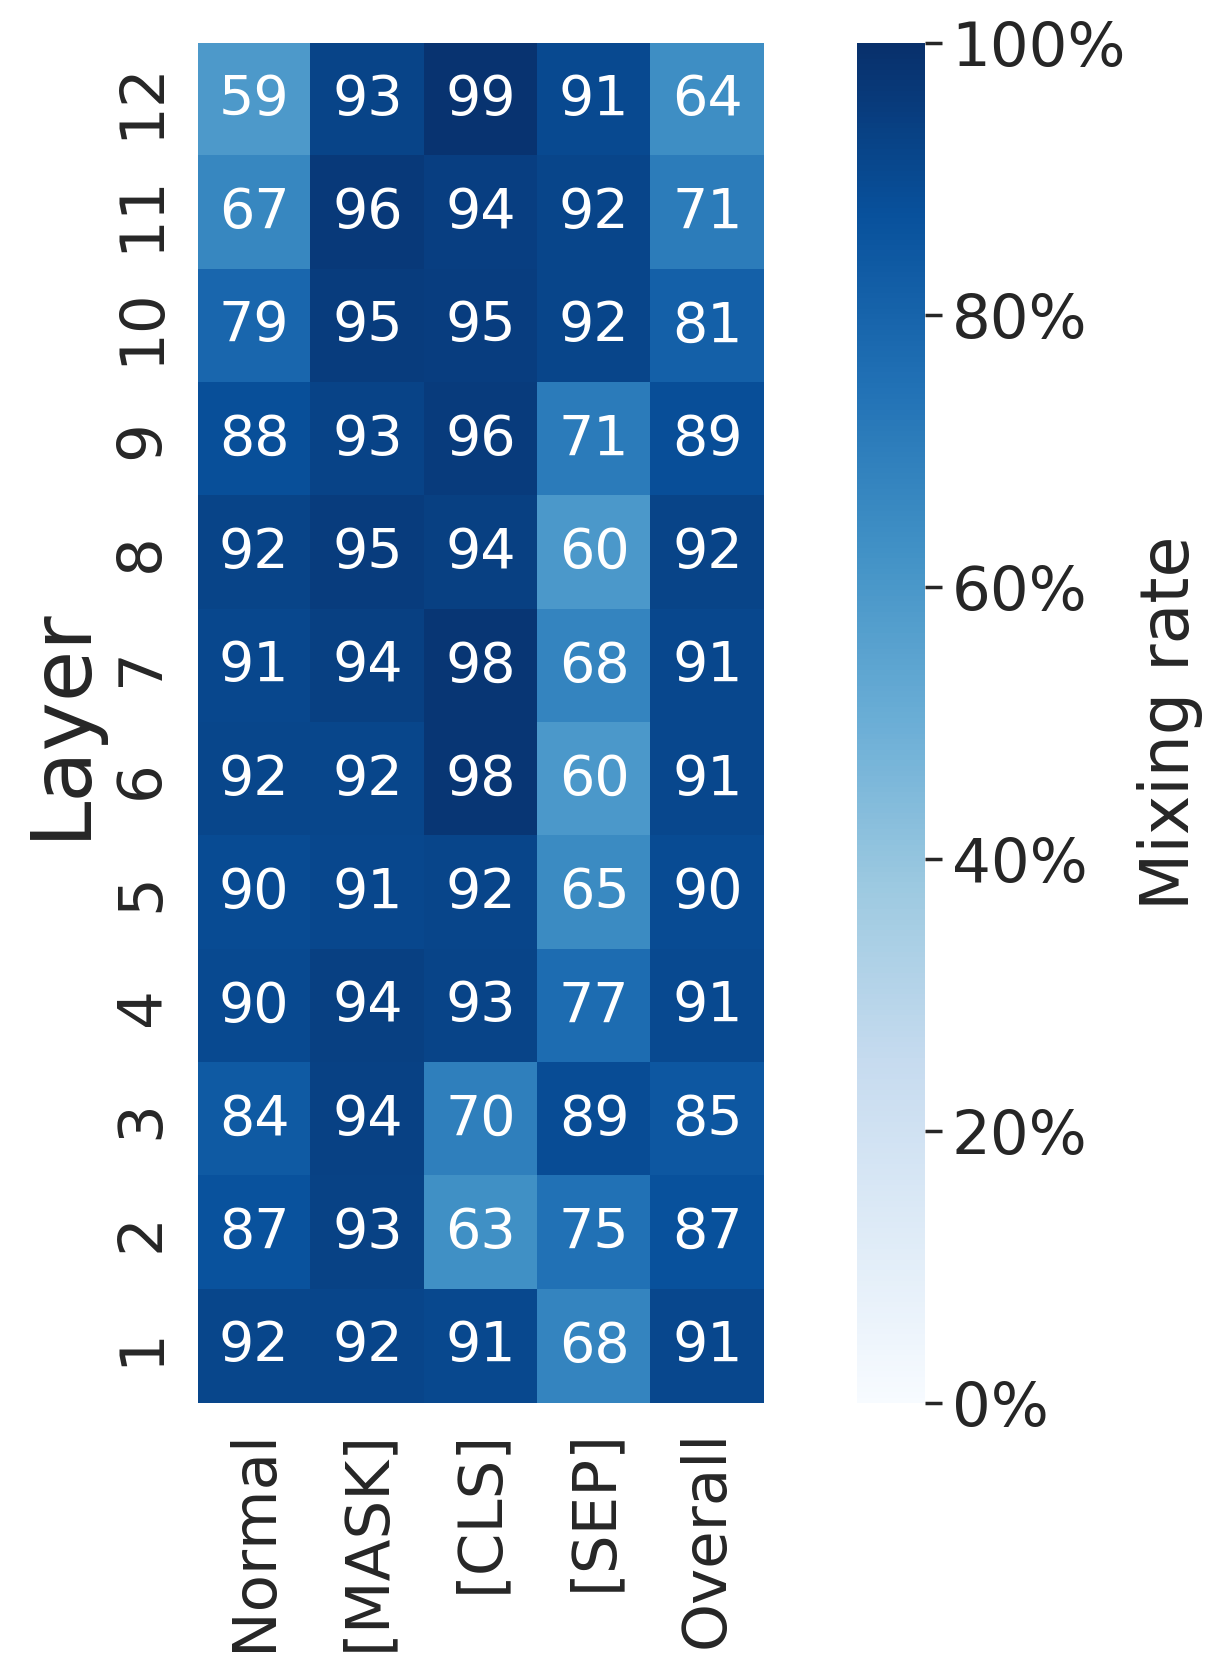

In [6]:
all_avg_lis = torch.load(f"./work/bert_{size}/avg/Attn_n_all")
cls_avg_lis = torch.load(f"./work/bert_{size}/avg/Attn_n_cls")
sep_avg_lis = torch.load(f"./work/bert_{size}/avg/Attn_n_sep")
mask_avg_lis = torch.load(f"./work/bert_{size}/avg/Attn_n_mask")
other_avg_lis = torch.load(f"./work/bert_{size}/avg/Attn_n_other")

plt.figure(figsize=(12,10), dpi=200)
lis = np.array([other_avg_lis[::-1], mask_avg_lis[::-1], cls_avg_lis[::-1], sep_avg_lis[::-1], all_avg_lis[::-1], ]).T * 100
df = pd.DataFrame(lis, columns=["Normal", "[MASK]", "[CLS]", "[SEP]", "Overall"], index=range(1,layer_num+1)[::-1])
ax = sns.heatmap(df,vmin=0,vmax=100,annot=True,cmap="Blues",square=True, fmt='.0f', annot_kws={"size": 20}, cbar_kws={'label': 'Mixing rate'})
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 20, 40, 60, 80, 100])
cbar.set_ticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.ylabel("Layer", fontsize=30)
plt.subplots_adjust(bottom=0.2)
plt.savefig(f"./results/bert_{size}_Attn_n_mixing_ratio.png")
plt.show()

### AttnRes-W:

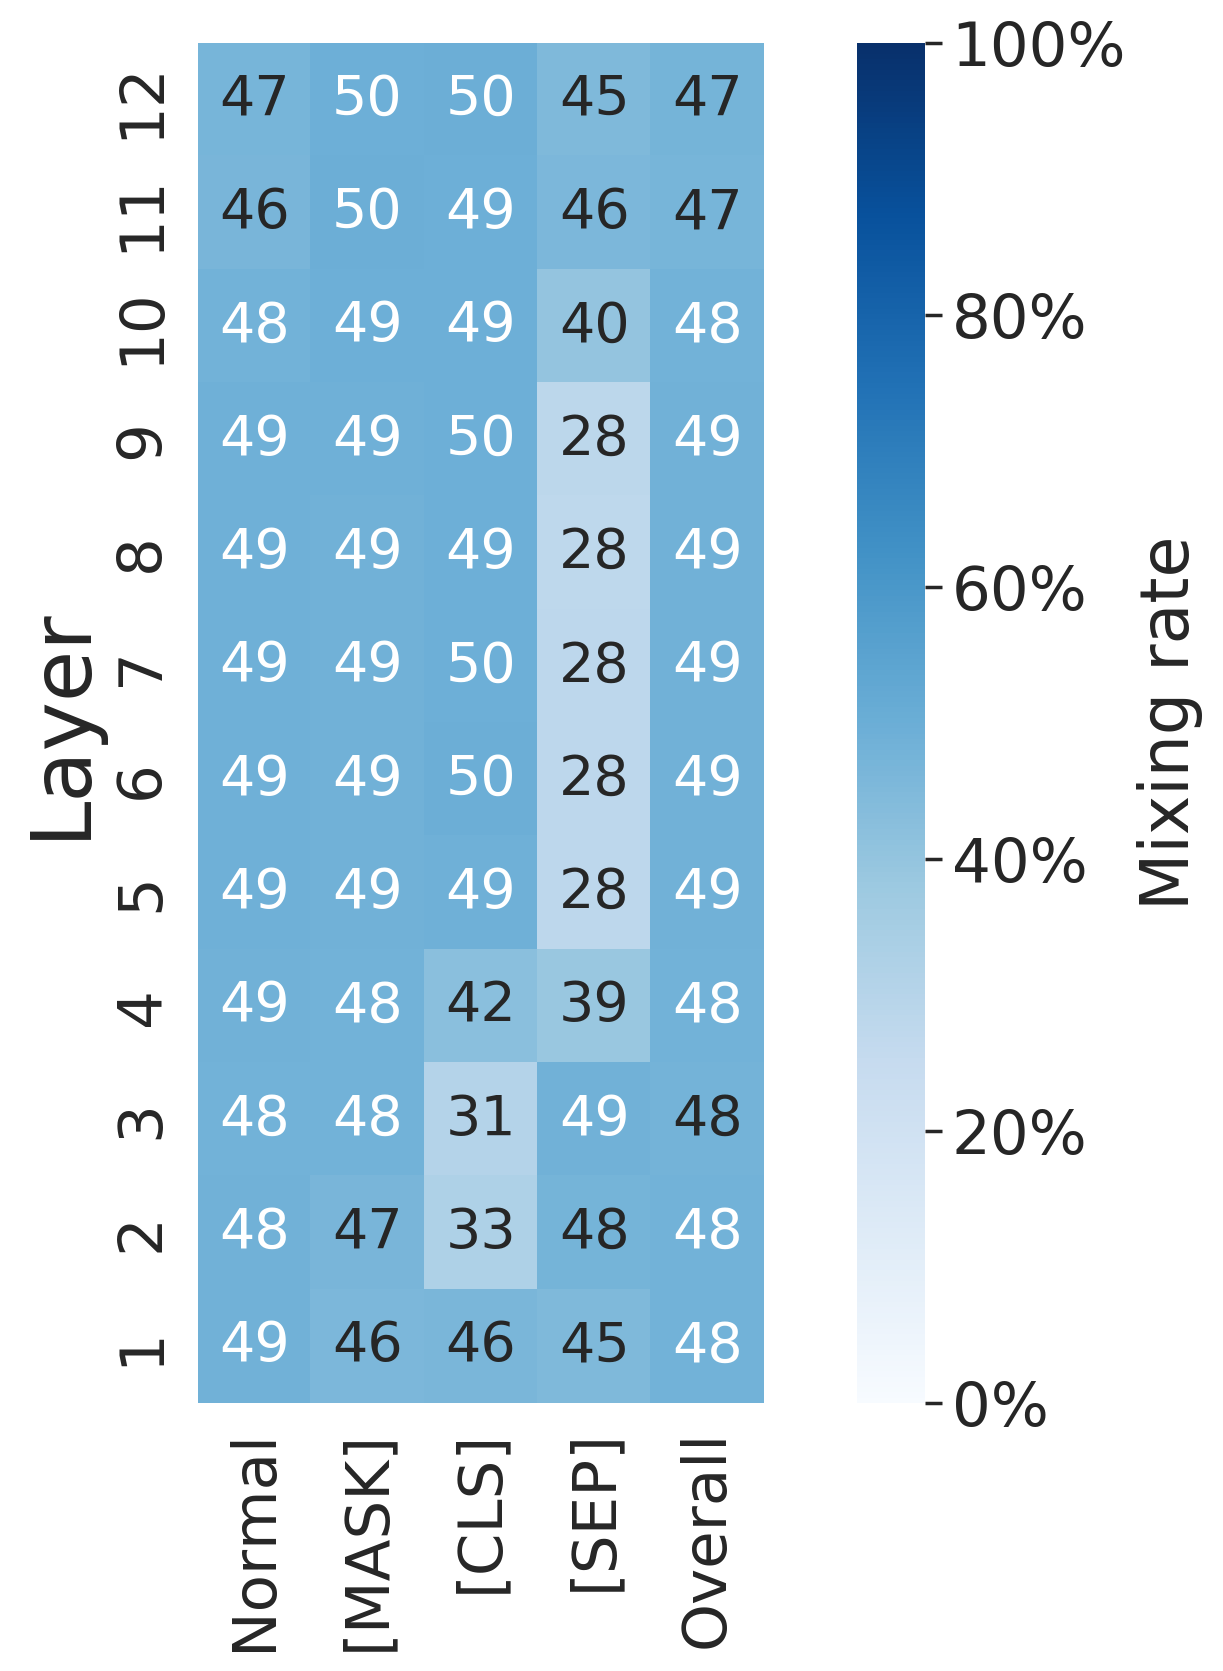

In [7]:
all_avg_lis = torch.load(f"./work/bert_{size}/avg/AttnRes_w_all")
cls_avg_lis = torch.load(f"./work/bert_{size}/avg/AttnRes_w_cls")
sep_avg_lis = torch.load(f"./work/bert_{size}/avg/AttnRes_w_sep")
mask_avg_lis = torch.load(f"./work/bert_{size}/avg/AttnRes_w_mask")
other_avg_lis = torch.load(f"./work/bert_{size}/avg/AttnRes_w_other")

plt.figure(figsize=(12,10), dpi=200)
lis = np.array([other_avg_lis[::-1], mask_avg_lis[::-1], cls_avg_lis[::-1], sep_avg_lis[::-1], all_avg_lis[::-1], ]).T * 100
df = pd.DataFrame(lis, columns=["Normal", "[MASK]", "[CLS]", "[SEP]", "Overall"], index=range(1,layer_num+1)[::-1])
ax = sns.heatmap(df,vmin=0,vmax=100,annot=True,cmap="Blues",square=True, fmt='.0f', annot_kws={"size": 20}, cbar_kws={'label': 'Mixing rate'})
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 20, 40, 60, 80, 100])
cbar.set_ticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.ylabel("Layer", fontsize=30)
plt.subplots_adjust(bottom=0.2)
plt.savefig(f"./results/bert_{size}_AttnRes_w_mixing_ratio.png")
plt.show()

### AttnRes-N:

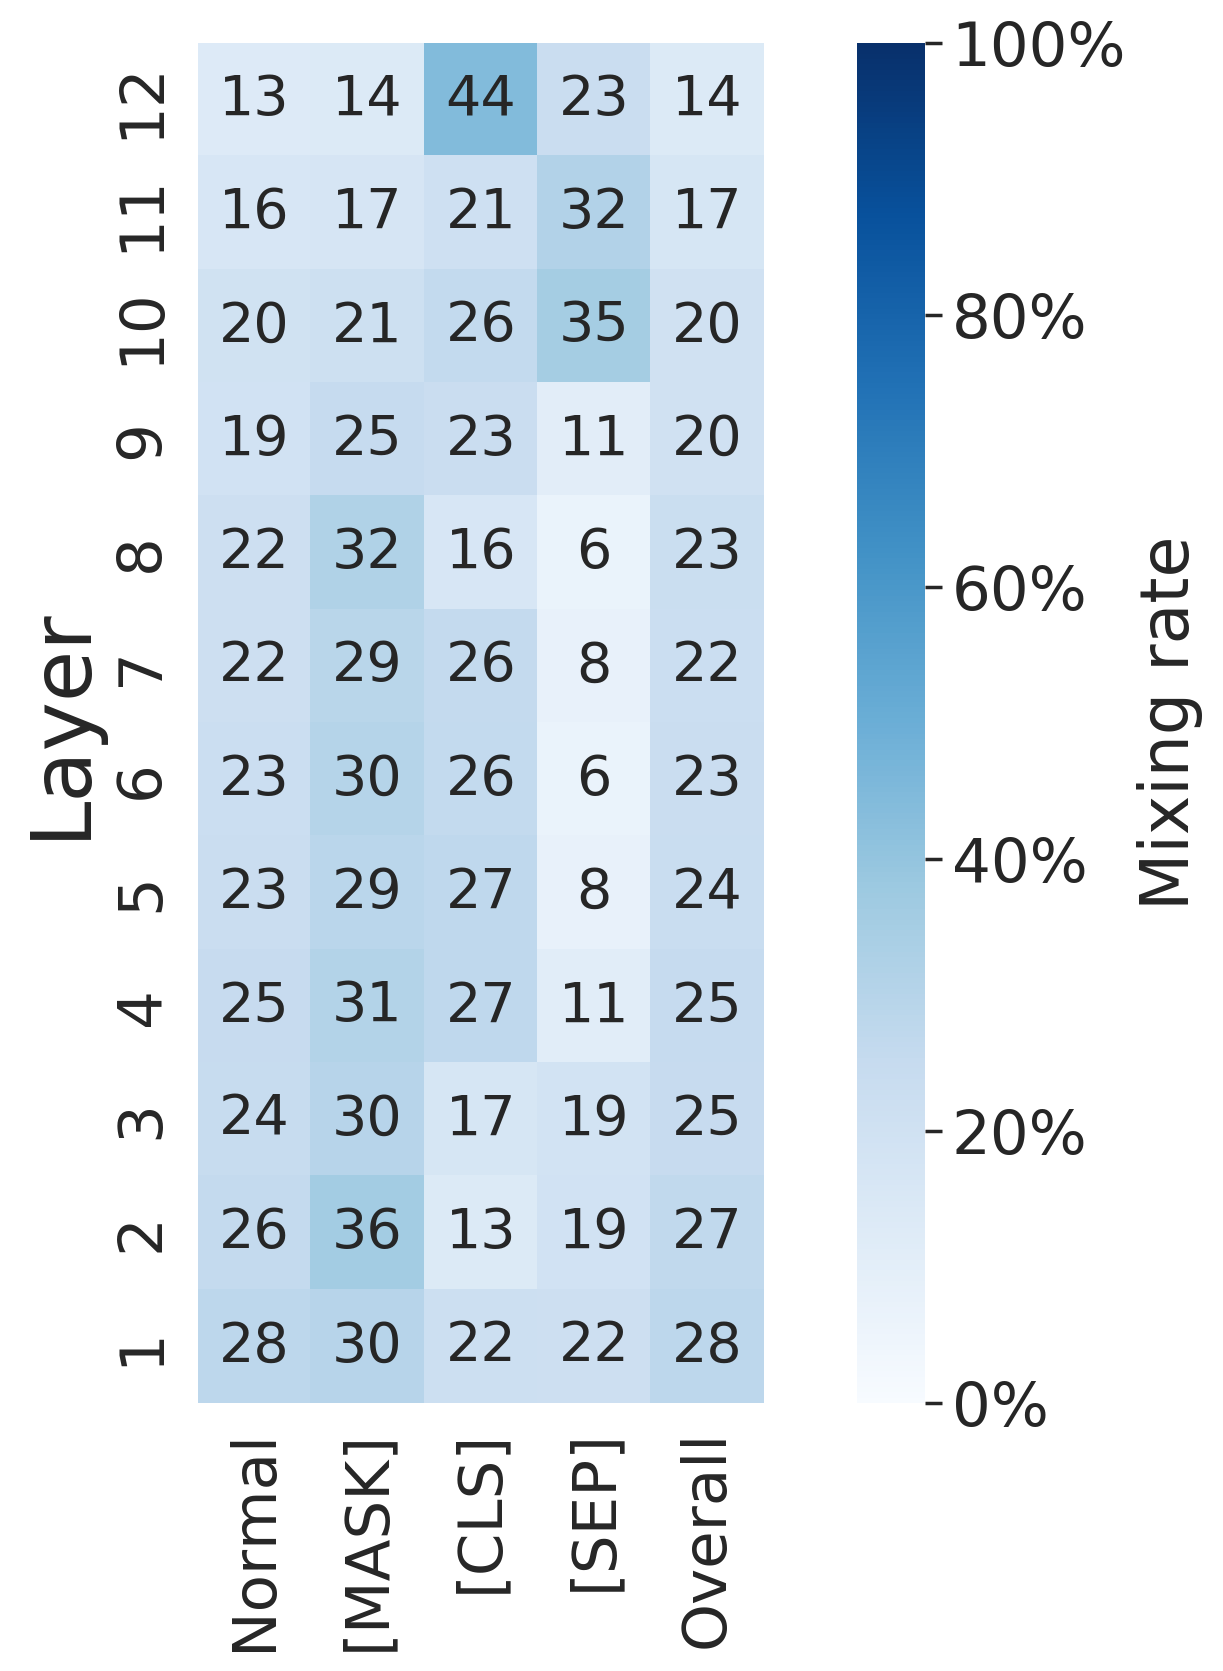

In [8]:
all_avg_lis = torch.load(f"./work/bert_{size}/avg/AttnRes_n_all")
cls_avg_lis = torch.load(f"./work/bert_{size}/avg/AttnRes_n_cls")
sep_avg_lis = torch.load(f"./work/bert_{size}/avg/AttnRes_n_sep")
mask_avg_lis = torch.load(f"./work/bert_{size}/avg/AttnRes_n_mask")
other_avg_lis = torch.load(f"./work/bert_{size}/avg/AttnRes_n_other")

plt.figure(figsize=(12,10), dpi=200)
lis = np.array([other_avg_lis[::-1], mask_avg_lis[::-1], cls_avg_lis[::-1], sep_avg_lis[::-1], all_avg_lis[::-1], ]).T * 100
df = pd.DataFrame(lis, columns=["Normal", "[MASK]", "[CLS]", "[SEP]", "Overall"], index=range(1,layer_num+1)[::-1])
ax = sns.heatmap(df,vmin=0,vmax=100,annot=True,cmap="Blues",square=True, fmt='.0f', annot_kws={"size": 20}, cbar_kws={'label': 'Mixing rate'})
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 20, 40, 60, 80, 100])
cbar.set_ticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.ylabel("Layer", fontsize=30)
plt.subplots_adjust(bottom=0.2)
plt.savefig(f"./results/bert_{size}_AttnRes_n_mixing_ratio.png")
plt.show()

### AttnResLn-N:

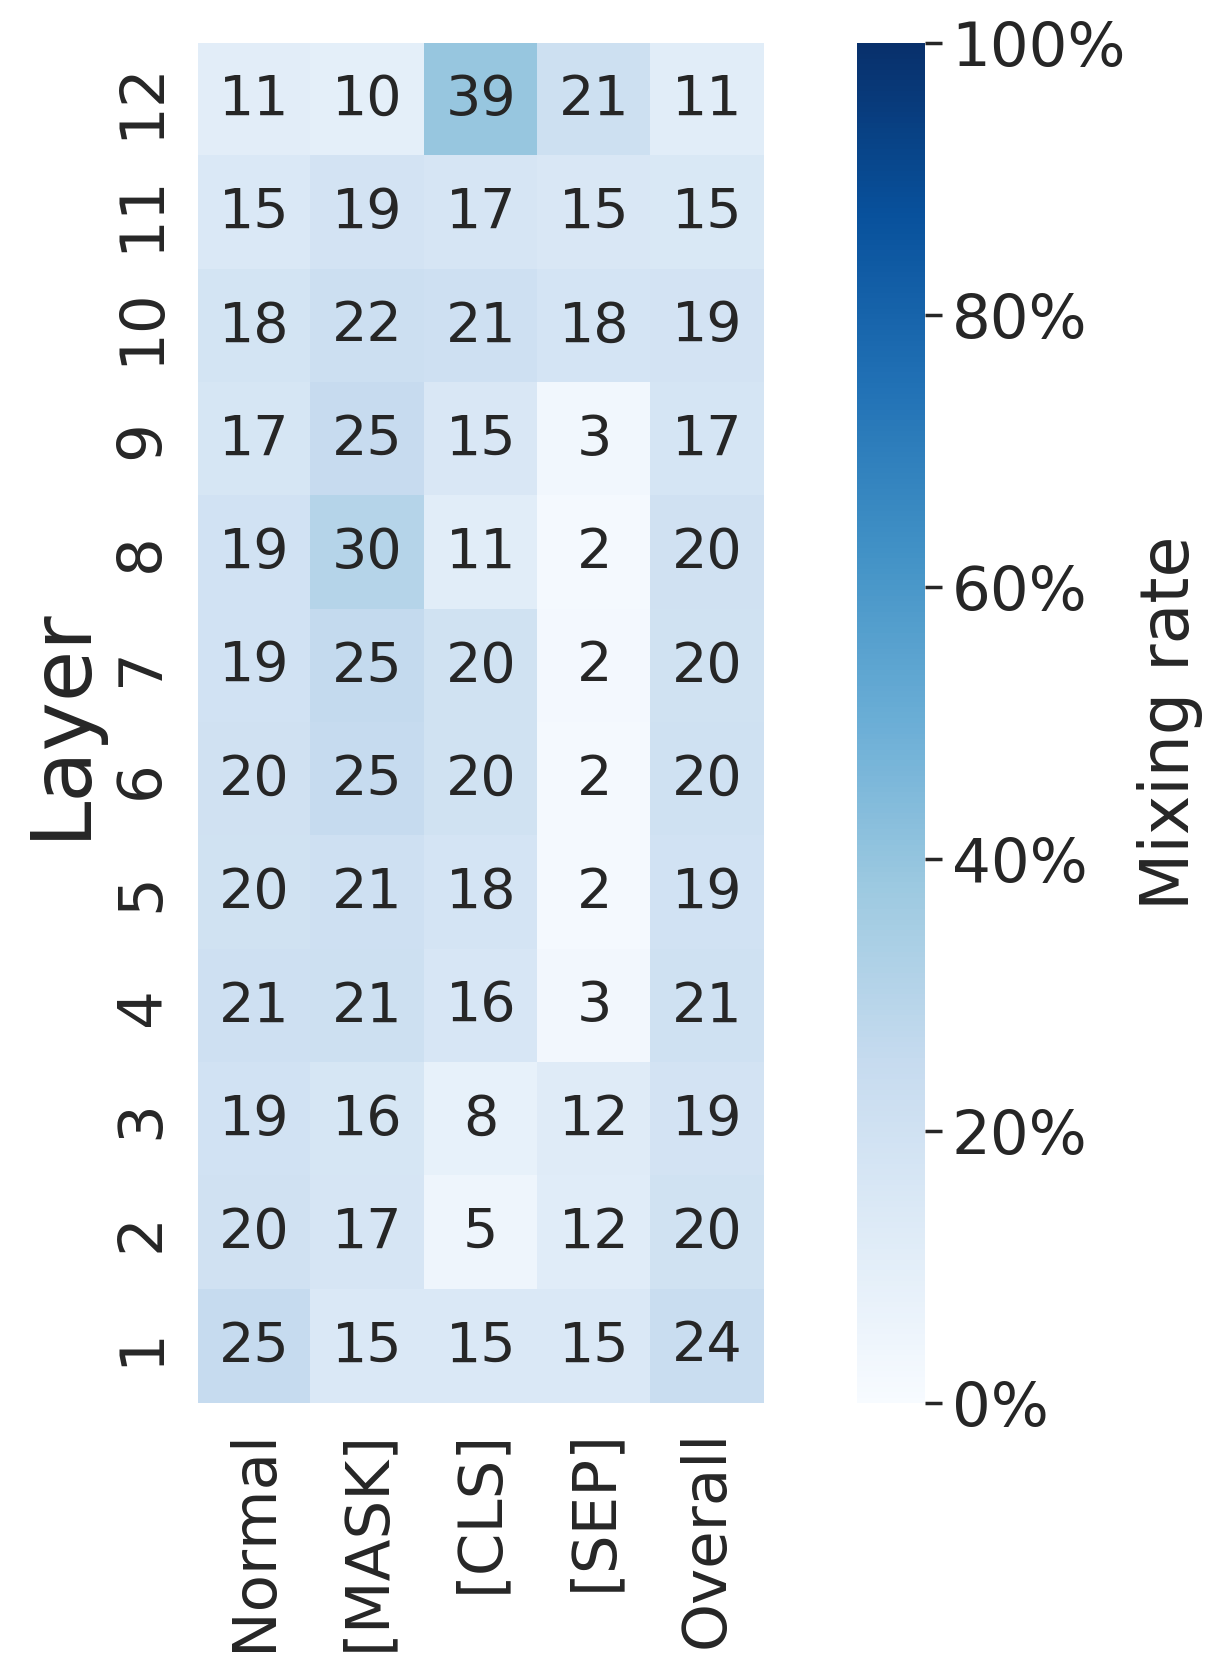

In [9]:
all_avg_lis = torch.load(f"./work/bert_{size}/avg/AttnResLn_n_all")
cls_avg_lis = torch.load(f"./work/bert_{size}/avg/AttnResLn_n_cls")
sep_avg_lis = torch.load(f"./work/bert_{size}/avg/AttnResLn_n_sep")
mask_avg_lis = torch.load(f"./work/bert_{size}/avg/AttnResLn_n_mask")
other_avg_lis = torch.load(f"./work/bert_{size}/avg/AttnResLn_n_other")

plt.figure(figsize=(12,10), dpi=200)
lis = np.array([other_avg_lis[::-1], mask_avg_lis[::-1], cls_avg_lis[::-1], sep_avg_lis[::-1], all_avg_lis[::-1], ]).T * 100
df = pd.DataFrame(lis, columns=["Normal", "[MASK]", "[CLS]", "[SEP]", "Overall"], index=range(1,layer_num+1)[::-1])
ax = sns.heatmap(df,vmin=0,vmax=100,annot=True,cmap="Blues",square=True, fmt='.0f', annot_kws={"size": 20}, cbar_kws={'label': 'Mixing rate'})
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 20, 40, 60, 80, 100])
cbar.set_ticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.ylabel("Layer", fontsize=30)
plt.subplots_adjust(bottom=0.2)
plt.savefig(f"./results/bert_{size}_AttnResLn_n_mixing_ratio.png")
plt.show()

# Relationship between word frequency and mixing ratio (Table 2 and Figure 4)

In [1]:
!CUDA_VISIBLE_DEVICES=0 python ./src/relation_with_freq.py

100%|█████████████████████████████████████████| 992/992 [01:18<00:00, 12.63it/s]


---------- all tokens ----------
Attn-W:		0.159
Attn-N:		-0.387
AttnRes-W:	0.159
AttnRes-N:	-0.839
AttnResLn-N:	-0.544
---------- w/o special tokens ----------
Attn-W:		0.144
Attn-N:		-0.413
AttnRes-W:	0.144
AttnRes-N:	-0.860
AttnResLn-N:	-0.577


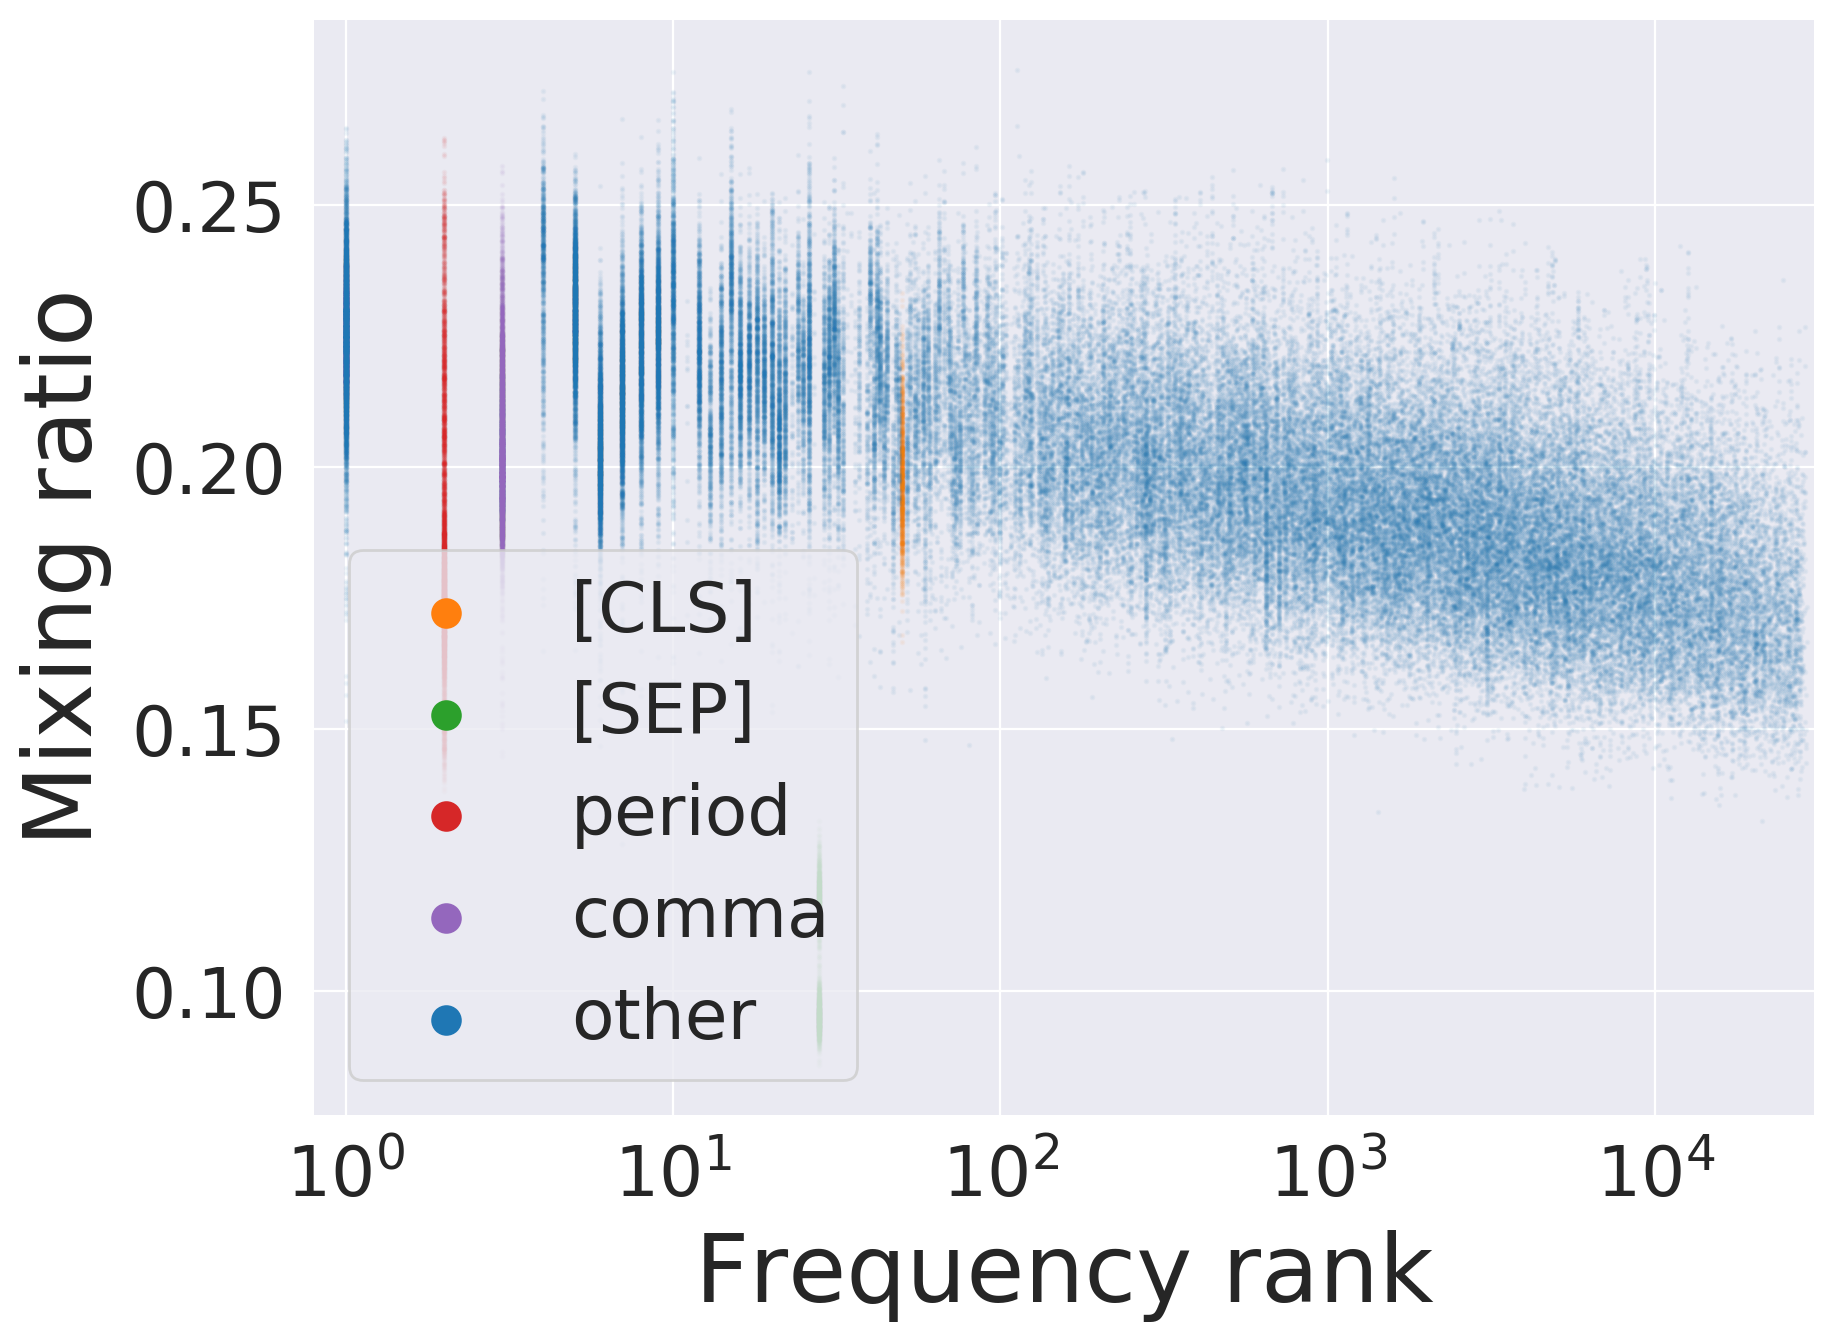

In [1]:
from src.relation_with_freq_utils import rank_spearman, rank_spearman_without_specials, viz_rank

size = "base"
print("-"*10, "all tokens", "-"*10)
rank_spearman(size)
print("-"*10, "w/o special tokens", "-"*10)
rank_spearman_without_specials(size)
viz_rank(size)